(540, 2500) (540,)


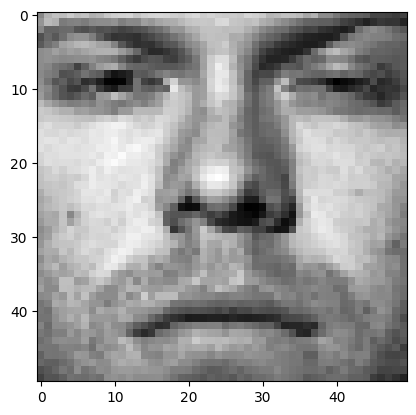

In [3]:
import numpy as np
from PIL import Image
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = np.array(Image.open(line.strip().split()[0]).convert('L'))
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

## Average Face

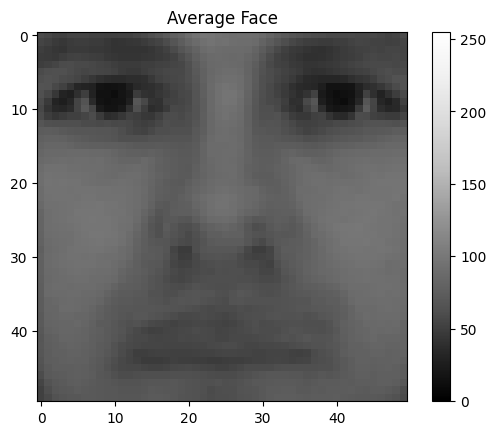

In [8]:
# Display the average face
mu = np.sum(train_data, axis=0) / train_data.shape[0]
plt.figure()
plt.imshow(mu.reshape(50, 50), cmap=cm.Greys_r, vmin=0, vmax=255)
plt.title('Average Face')
plt.colorbar()
plt.show()

## Mean Subtraction

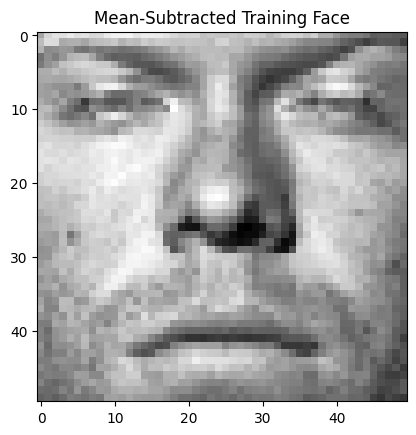

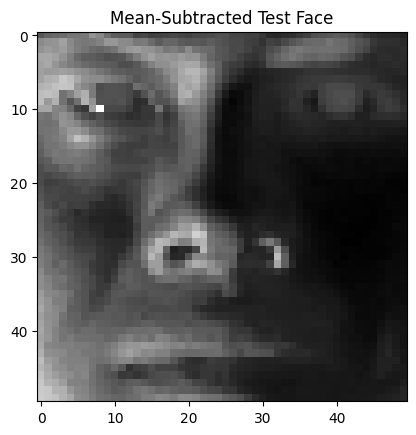

In [ ]:
train_data = train_data - mu

plt.figure()
plt.imshow(train_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.title('Mean-Subtracted Training Face')
plt.show()

test_labels, test_data = [], []
for line in open('./faces/test.txt'):
  im = np.array(Image.open(line.strip().split()[0]).convert('L'))
  test_data.append(im.reshape(2500,))
  test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

test_data = test_data - mu

# Display a mean-subtracted test image
plt.figure()
plt.imshow(test_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.title('Mean-Subtracted Test Face')
plt.show()

## Eigenface

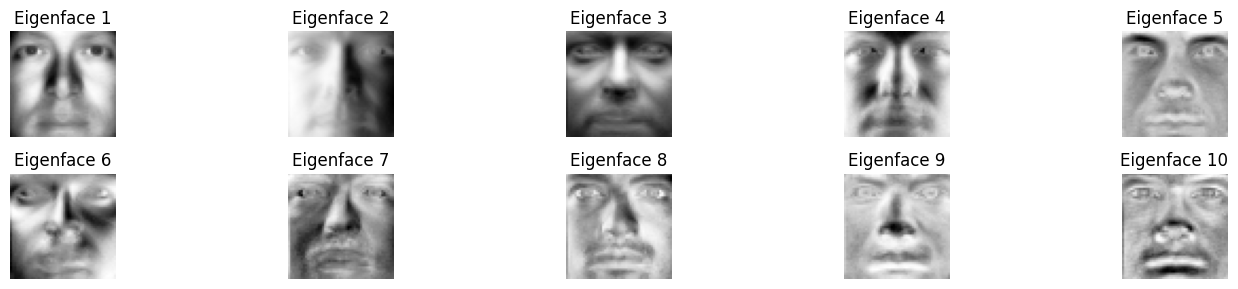

In [11]:
# Compute X^T X (covariance matrix)
XTX = np.dot(train_data.T, train_data)

# Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(XTX)

# Take real parts to handle any numerical precision issues
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

# Sort by eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# V^T where each row is an eigenface
VT = eigenvectors.T

# Display the first 10 eigenfaces
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(VT[i, :].reshape(50, 50), cmap=cm.Greys_r)
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()